In [64]:
# Whole Foods Supermarket Count in the USA
import json

# Path to the JSON file containing the flattened array of Whole Foods locations
file_path = '../data/whole_foods.json'

# Open and load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Check if the data is a list (which it should be since it's flattened now)
if isinstance(data, list):
    total_supermarkets = len(data)
else:
    total_supermarkets = 0

# Output the total count
print(f"Total number of Whole Foods supermarkets: {total_supermarkets}")

Total number of Whole Foods supermarkets: 470


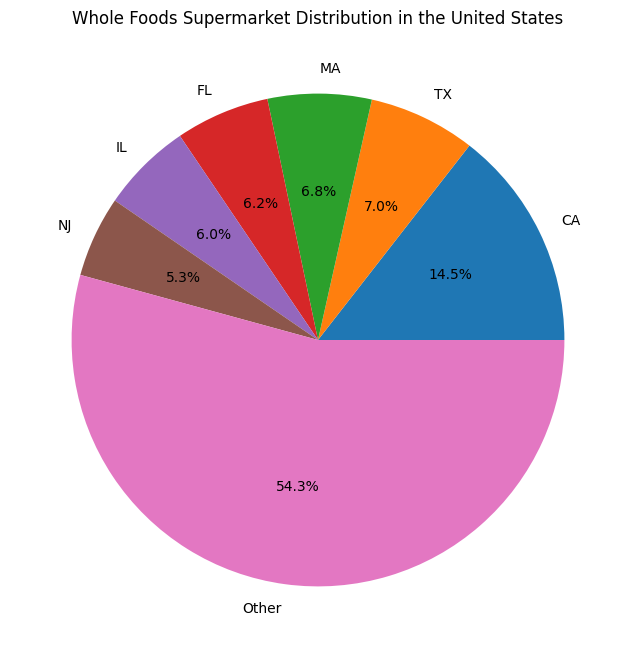

In [65]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Path to your Whole Foods data (already flattened)
file_path = '../data/whole_foods.json'

# Open and load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Initialize a Counter to track the number of Whole Foods per state
state_counter = Counter()

# Iterate through each store in the flattened dataset
for store in data:
    # Extract the state from the 'formatted_address' field
    # Assuming state is the second last element in the address
    address_parts = store['formatted_address'].split(',')
    if len(address_parts) >= 3:
        state = address_parts[-2].strip().split()[0]  # Extract the state abbreviation (e.g., 'NY' for New York)
        state_counter[state] += 1

most_common_states = state_counter.most_common(6)
largest_states = {state: count for state, count in most_common_states}

# Sum the rest of the states under "Other"
other_count = sum(count for state, count in state_counter.items() if state not in largest_states)
largest_states['Other'] = other_count

# Prepare data for the pie chart
labels = list(largest_states.keys())
sizes = list(largest_states.values())

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Whole Foods Supermarket Distribution in the United States')
plt.show()

In [38]:
import json
from collections import Counter

# Path to your Whole Foods data (already flattened)
file_path = '../data/whole_foods.json'

# Open and load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Initialize a Counter to track the number of Whole Foods per city
city_counter = Counter()

# Iterate through each store in the dataset
for store in data:
    # Extract the city from the 'formatted_address' field
    address_parts = store['formatted_address'].split(',')
    
    # Assuming the second-to-last part is the city (e.g., "Brooklyn" in "292 Ashland Pl, Brooklyn, NY 11217, United States")
    if len(address_parts) >= 3:
        city = address_parts[-3].strip()
        
        # Group Brooklyn under New York
        if city == "Brooklyn":
            city = "New York"
        
        city_counter[city] += 1

# Get the top 10 cities with the most Whole Foods locations
top_10_cities = city_counter.most_common(10)

# Display the top 10 cities and their number of Whole Foods locations
print(f"Whole Foods locations")
print(f"---------------------")
for city, count in top_10_cities:
    print(f"{city}: {count}")

Whole Foods locations
---------------------
New York: 18
Chicago: 11
San Francisco: 8
Washington: 8
Atlanta: 8
Los Angeles: 7
Denver: 5
Portland: 5
Phoenix: 4
Austin: 4


In [66]:
import json

# Path to your Whole Foods data (already flattened)
file_path = '../data/whole_foods.json'

# Open and load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Filter out locations that are not operational or have a 0 rating
locations_with_valid_ratings = [
    store for store in data
    if store.get('business_status') == 'OPERATIONAL' and 'rating' in store and store['rating'] > 0
]

# Sort the locations by rating (ascending for worst, descending for best)
sorted_by_rating = sorted(locations_with_valid_ratings, key=lambda x: x['rating'])

# Get the 10 worst-rated locations (at the beginning of the sorted list)
worst_10 = sorted_by_rating[:10]

# Get the 10 best-rated locations (from the end of the sorted list)
best_10 = sorted_by_rating[-10:]

# Print the worst-rated locations
print("10 Whole Foods locations with the worst ratings:")
print("------------------------------------------------")
for store in worst_10:
    print(f"{store['formatted_address']}: {store['rating']} stars")

# Print the best-rated locations
print("\n10 Whole Foods locations with the best ratings")
print("------------------------------------------------")
for store in best_10[::-1]:  # Reverse to display highest ratings first
    print(f"{store['formatted_address']}: {store['rating']} stars")

10 Whole Foods locations with the worst ratings:
------------------------------------------------
167 41st St, Brooklyn, NY 11232, United States: 2.3 stars
640 N La Salle Dr #300, Chicago, IL 60654, United States: 2.5 stars
807 Las Cimas Pkwy, Austin, TX 78746, United States: 2.8 stars
1521 Cabin Branch Dr, North Englewood, MD 20785, United States: 3.2 stars
210 Hudson St Ste 700, Jersey City, NJ 07311, United States: 3.2 stars
211 BDC Pkwy, Braselton, GA 30517, United States: 3.5 stars
Colony Square, 1197 Peachtree St NE Ste 400, Atlanta, GA 30361, United States: 3.5 stars
601 Washington Ave, Ocean Springs, MS 39564, United States: 3.6 stars
355 Pearl St, Jersey City, NJ 07302, United States: 3.8 stars
690 Stanyan St, San Francisco, CA 94117, United States: 3.9 stars

10 Whole Foods locations with the best ratings
------------------------------------------------
143 Maple Ave E, Vienna, VA 22180, United States: 4.9 stars
26 13th St NW, Atlanta, GA 30309, United States: 4.7 stars
7930 

In [67]:
import folium
import json
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd

# Load the Whole Foods data
file_path = '../data/whole_foods.json'

# Open and load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract latitude and longitude for each store
locations = []

for store in data:
    # Ensure the store is operational
    if store['business_status'] == 'OPERATIONAL':
        lat = store['geometry']['location']['lat']
        lng = store['geometry']['location']['lng']
        locations.append((lat, lng))

# Convert to DataFrame
df = pd.DataFrame(locations, columns=['Lat', 'Lng'])

# Function to snap to grid
GRID_SIZE = 0.05  # This grid size is adjustable depending on the density of locations

def snap_to_grid(coordinate):
    """Snap a latitude or longitude to the nearest grid coordinate"""
    return round(coordinate / GRID_SIZE) * GRID_SIZE

# Snap Whole Foods data to grid
df['GRID_LAT'] = df['Lat'].apply(snap_to_grid)
df['GRID_LONG'] = df['Lng'].apply(snap_to_grid)

# Group by grid location
grouped_stores = df.groupby(['GRID_LAT', 'GRID_LONG']).size().reset_index(name='counts')

# Create the map, adjust the center and zoom depending on your area of interest
m = folium.Map(location=[df['Lat'].mean(), df['Lng'].mean()], zoom_start=5, tiles='CartoDB Positron')

# Calculate max count for scaling purposes
max_count = grouped_stores['counts'].max()

# Add circles to the map for each grouped location
for idx, row in grouped_stores.iterrows():
    # Scale the radius according to count
    radius = (row['counts'] / max_count) * 20  # Adjust the scale if necessary
    
    folium.CircleMarker(
        location=(row['GRID_LAT'], row['GRID_LONG']),
        radius=radius,
        fill=True,
        fill_opacity=0.7,
        color='green',
        fill_color='green'
    ).add_to(m)

# Display the map
m

# Save the map to an HTML file if needed
m.save('whole_foods_heatmap.html')